## Observations and Insights 

In [195]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_data = pd.merge(mouse_metadata,study_results, on = "Mouse ID", how = "left")


# Display the data table for preview
merge_data.head(50)

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0      k403     Ramicane    Male          21          16          0   
1      k403     Ramicane    Male          21          16          5   
2      k403     Ramicane    Male          21          16         10   
3      k403     Ramicane    Male          21          16         15   
4      k403     Ramicane    Male          21          16         20   
5      k403     Ramicane    Male          21          16         25   
6      k403     Ramicane    Male          21          16         30   
7      k403     Ramicane    Male          21          16         35   
8      k403     Ramicane    Male          21          16         40   
9      k403     Ramicane    Male          21          16         45   
10     s185    Capomulin  Female           3          17          0   
11     s185    Capomulin  Female           3          17          5   
12     s185    Capomulin  Female           3          17         10   
13     s185    Capomulin  Female           3          17         15   
14     s185    Capomulin  Female           3          17         20   
15     s185    Capomulin  Female           3          17         25   
16     s185    Capomulin  Female           3          17         30   
17     s185    Capomulin  Female           3          17         35   
18     s185    Capomulin  Female           3          17         40   
19     s185    Capomulin  Female           3          17         45   
20     x401    Capomulin  Female          16          15          0   
21     x401    Capomulin  Female          16          15          5   
22     x401    Capomulin  Female          16          15         10   
23     x401    Capomulin  Female          16          15         15   
24     x401    Capomulin  Female          16          15         20   
25     x401    Capomulin  Female          16          15         25   
26     x401    Capomulin  Female          16          15         30   
27     x401    Capomulin  Female          16          15         35   
28     x401    Capomulin  Female          16          15         40   
29     x401    Capomulin  Female          16          15         45   
30     m601    Capomulin    Male          22          17          0   
31     m601    Capomulin    Male          22          17          5   
32     m601    Capomulin    Male          22          17         10   
33     m601    Capomulin    Male          22          17         15   
34     m601    Capomulin    Male          22          17         20   
35     m601    Capomulin    Male          22          17         25   
36     m601    Capomulin    Male          22          17         30   
37     m601    Capomulin    Male          22          17         35   
38     m601    Capomulin    Male          22          17         40   
39     m601    Capomulin    Male          22          17         45   
40     g791     Ramicane    Male          11          16          0   
41     g791     Ramicane    Male          11          16          5   
42     g791     Ramicane    Male          11          16         10   
43     g791     Ramicane    Male          11          16         15   
44     g791     Ramicane    Male          11          16         20   
45     g791     Ramicane    Male          11          16         25   
46     g791     Ramicane    Male          11          16         30   
47     g791     Ramicane    Male          11          16         35   
48     g791     Ramicane    Male          11          16         40   
49     g791     Ramicane    Male          11          16         45   

    Tumor Volume (mm3)  Metastatic Sites  
0            45.000000                 0  
1            38.825898                 0  
2            35.014271                 1  
3            34.223992                 1  
4            32.997729                 1  
5            33.464577                 1  
6            31.099498                 1  
7            26.546993               

In [40]:
# Checking the number of mice.
number_of_mice = len(merge_data)
print(number_of_mice)

1893


In [44]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_mouse_ids = merge_data.loc[merge_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()




In [8]:
# Optional: Get all the data for the duplicate mouse ID. 



In [46]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merge_data[merge_data["Mouse ID"].isin(duplicate_mouse_ids)==False]
clean_data

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1880 rows x 8 columns]

In [47]:
# Checking the number of mice in the clean DataFrame.
x = len(clean_data)
print (x)

1880


## Summary Statistics

In [288]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stat_mean = clean_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
stat_med = clean_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
stat_var = clean_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
stat_std = clean_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
stat_sem = clean_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']

summary_data = pd.DataFrame({"Mean":stat_mean,"Median":stat_med,"Var":stat_var,"Standard D":stat_std,"SEM":stat_sem})
summary_data


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 



# Assemble the resulting series into a single summary dataframe.



Mean     Median        Var  Standard D       SEM
Drug Regimen                                                       
Capomulin     40.675741  41.557809  24.947764    4.994774  4.994774
Ceftamin      52.591172  51.776157  39.290177    6.268188  6.268188
Infubinol     52.884795  51.820584  43.128684    6.567243  6.567243
Ketapril      55.235638  53.698743  68.553577    8.279709  8.279709
Naftisol      54.331565  52.509285  66.173479    8.134708  8.134708
Placebo       54.033581  52.288934  61.168083    7.821003  7.821003
Propriva      52.320930  50.446266  43.852013    6.622085  6.622085
Ramicane      40.216745  40.673236  23.486704    4.846308  4.846308
Stelasyn      54.233149  52.431737  59.450562    7.710419  7.710419
Zoniferol     53.236507  51.818479  48.533355    6.966589  6.966589

In [272]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
stat_agg = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]
stat_agg.aggregate(['mean', 'median','var','std','sem'])


mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

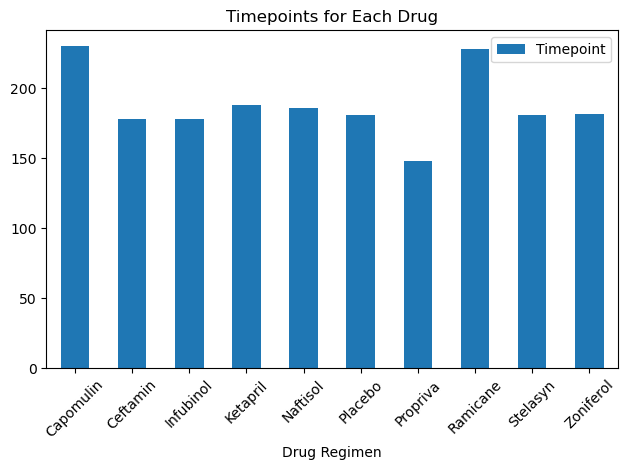

In [246]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

x_values = clean_data.groupby(["Drug Regimen"])
y_values = x_values["Timepoint"].count()


df = pd.DataFrame({"x":x_values,"Timepoint":y_values})

dx = df.plot.bar(rot = 45,title = 'Timepoints for Each Drug')






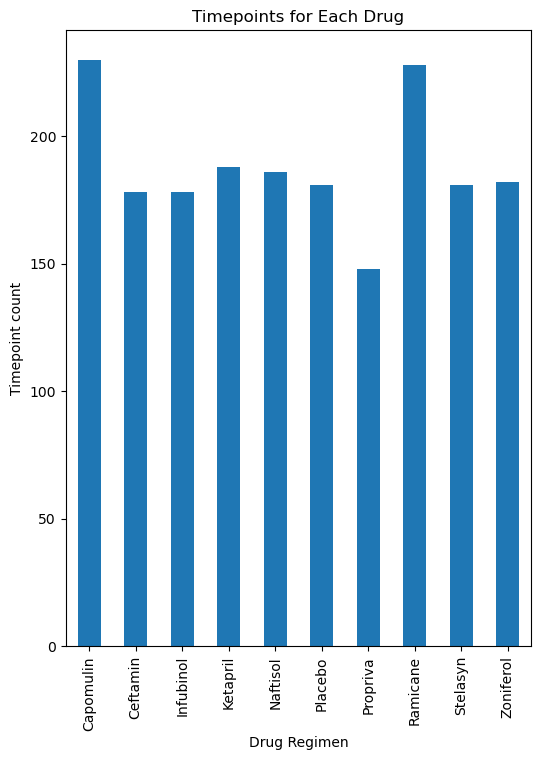

<Figure size 640x480 with 0 Axes>

In [215]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

group = clean_data.groupby(["Drug Regimen"])
count = group["Timepoint"].count()

count_chart = count.plot(kind='bar', figsize=(6,8))
plt.title('Timepoints for Each Drug')
plt.ylabel("Timepoint count")
plt.show()
plt.tight_layout()

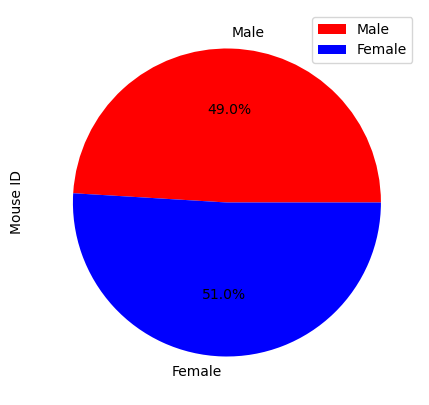

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
labels = ["Male", "Female"]
sizes = clean_data.groupby("Sex").count()
colors = ["red","blue"]


pie1 = pd.DataFrame(sizes)
pie2 = pie1.plot.pie(y = "Mouse ID", figsize=(20, 5), colors = colors, labels = labels, autopct="%1.1f%%")



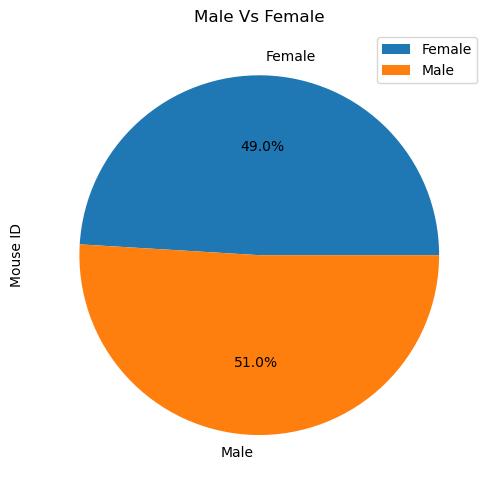

In [258]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

j = clean_data.groupby("Sex").count()


count_chart = j.plot(y = "Mouse ID", kind='pie', figsize=(20,5),autopct="%1.1f%%")
plt.title('Male Vs Female')

plt.show()


## Quartiles, Outliers and Boxplots

In [105]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  


# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

x = clean_data.groupby("Mouse ID")["Timepoint"].max()
x = x.reset_index()
y = x.merge(clean_data,on = ["Mouse ID","Timepoint"], how = "left")
y


Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
2       a262         45      Placebo  Female          17          29   
3       a275         45     Ceftamin  Female          20          28   
4       a366         30     Stelasyn  Female          16          29   
..       ...        ...          ...     ...         ...         ...   
243     z435         10     Propriva  Female          12          26   
244     z578         45     Ramicane    Male          11          16   
245     z581         45    Infubinol  Female          24          25   
246     z795         45     Naftisol  Female          13          29   
247     z969         45     Naftisol    Male           9          30   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
2             70.717621                 4  
3             62.999356                 3  
4             63.440686                 1  
..                  ...               ...  
243           48.710661                 0  
244           30.638696                 0  
245           62.754451                 3  
246           65.741070                 3  
247           73.867845                 4  

[248 rows x 8 columns]

In [54]:
# Put treatments into a list for for loop (and later for plot labels)
list_drug = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
list_tumor = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in list_drug:
    tumor_vol = y.loc[y["Drug Regimen"]==drug,]["Tumor Volume (mm3)"]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    list_tumor.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    IQR = upperq - lowerq
    outliers = tumor_vol.loc[(tumor_vol>upperq+(1.5*IQR))| (tumor_vol<lowerq-(1.5*IQR))]
    print(outliers)


    

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


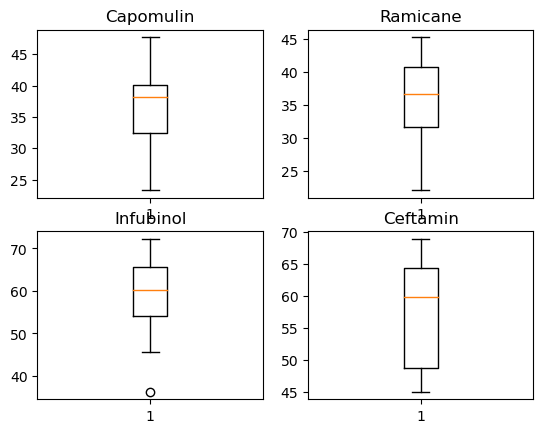

In [111]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig, axs = plt.subplots(2, 2)
axs[0, 0].boxplot(y.loc[y["Drug Regimen"]=="Capomulin",]["Tumor Volume (mm3)"])
axs[0, 0].set_title('Capomulin')

axs[0, 1].boxplot(y.loc[y["Drug Regimen"]=="Ramicane",]["Tumor Volume (mm3)"])
axs[0, 1].set_title('Ramicane')

axs[1, 0].boxplot(y.loc[y["Drug Regimen"]=="Infubinol",]["Tumor Volume (mm3)"])
axs[1, 0].set_title('Infubinol')

axs[1, 1].boxplot(y.loc[y["Drug Regimen"]=="Ceftamin",]["Tumor Volume (mm3)"])
axs[1, 1].set_title('Ceftamin')

plt.show()




## Line and Scatter Plots

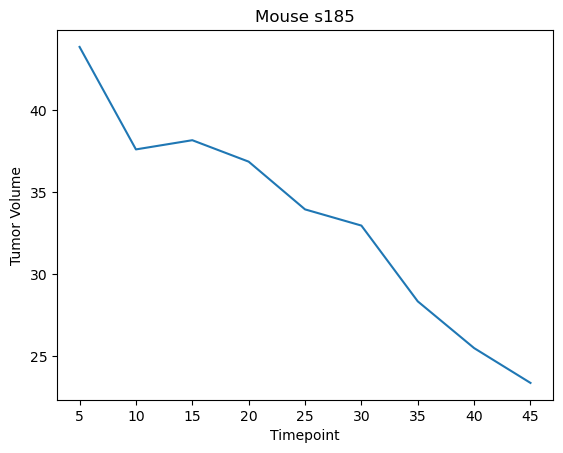

In [210]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
time = merge_data.iloc[11:20,5]
tumor = merge_data.iloc[11:20,6]
plt.title('Mouse s185')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.plot(time,tumor)
plt.show()


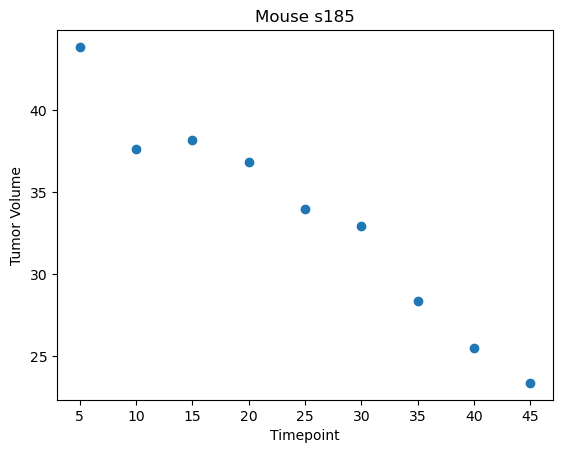

In [209]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
time = merge_data.iloc[11:20,5]
tumor = merge_data.iloc[11:20,6]

plt.title('Mouse s185')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.scatter(time,tumor)
plt.show()



## Correlation and Regression

The correlation between both factors is 0.53


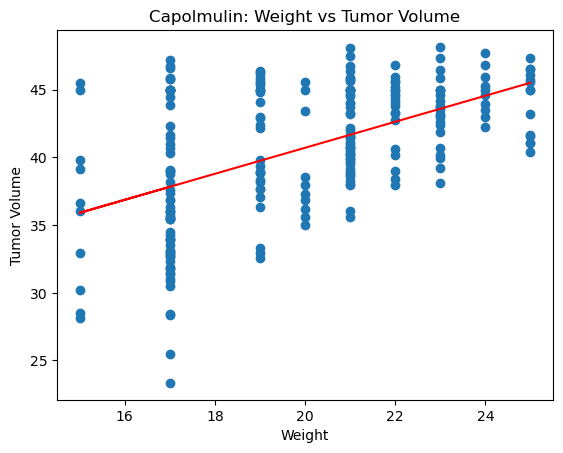

In [214]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

weight = merge_data.loc[merge_data["Drug Regimen"]=="Capomulin",]["Weight (g)"]
tumor_cap = merge_data.loc[merge_data["Drug Regimen"]=="Capomulin",]["Tumor Volume (mm3)"]


correlation = st.pearsonr(weight,tumor_cap)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumor_cap)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,tumor_cap)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(5.8,10),fontsize=15,color="red")
plt.title('Capolmulin: Weight vs Tumor Volume')
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.show()